#Uygulama 1: Çoklu  Doğrusal Regresyon Analizi

**Ön Hazırlık :  Örneğimizde veri setine Google Drive'dan erişildiği için drive bağlantısı yapılır**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Aşama: Veri toplama (veri setinin yüklenmesi)**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
data_file_path = "/content/drive/MyDrive/PythonileMakineOgrenmesi/VeriSetleri/Tr_ev_fiyatlari_v2.csv"
df = pd.read_csv(data_file_path) 
print(df.head())

      fiyat  alan  yatak_odasi  banyo_sayisi  kat_sayisi anayol_baglanti  \
0  13300000  7420            4             2           3            evet   
1  12250000  8960            4             4           4            evet   
2  12250000  9960            3             2           2            evet   
3  12215000  7500            4             2           2            evet   
4  11410000  7420            4             1           2            evet   

  misafir_odası bodrum sıcak_su  klima  otopark         mob_drm  
0         hayır  hayır    hayır   evet        2       mobilyalı  
1         hayır  hayır    hayır   evet        3       mobilyalı  
2         hayır   evet    hayır  hayır        2  yarı mobilyalı  
3         hayır   evet    hayır   evet        3       mobilyalı  
4          evet   evet    hayır   evet        2       mobilyalı  


**2. Aşama: Veri ön işleme**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fiyat            545 non-null    int64 
 1   alan             545 non-null    int64 
 2   yatak_odasi      545 non-null    int64 
 3   banyo_sayisi     545 non-null    int64 
 4   kat_sayisi       545 non-null    int64 
 5   anayol_baglanti  545 non-null    object
 6   misafir_odası    545 non-null    object
 7   bodrum           545 non-null    object
 8   sıcak_su         545 non-null    object
 9   klima            545 non-null    object
 10  otopark          545 non-null    int64 
 11  mob_drm          545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB
None


In [ ]:
print(df.describe())

              fiyat          alan  yatak_odasi  banyo_sayisi  kat_sayisi  \
count  5.450000e+02    545.000000   545.000000    545.000000  545.000000   
mean   4.766729e+06   5150.541284     2.965138      1.286239    1.805505   
std    1.870440e+06   2170.141023     0.738064      0.502470    0.867492   
min    1.750000e+06   1650.000000     1.000000      1.000000    1.000000   
25%    3.430000e+06   3600.000000     2.000000      1.000000    1.000000   
50%    4.340000e+06   4600.000000     3.000000      1.000000    2.000000   
75%    5.740000e+06   6360.000000     3.000000      2.000000    2.000000   
max    1.330000e+07  16200.000000     6.000000      4.000000    4.000000   

          otopark  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns 
df = pd.get_dummies(df, columns=object_columns)
print(df.head())

      fiyat  alan  yatak_odasi  banyo_sayisi  kat_sayisi  otopark  \
0  13300000  7420            4             2           3        2   
1  12250000  8960            4             4           4        3   
2  12250000  9960            3             2           2        2   
3  12215000  7500            4             2           2        3   
4  11410000  7420            4             1           2        2   

   anayol_baglanti_evet  anayol_baglanti_hayır  misafir_odası_evet  \
0                     1                      0                   0   
1                     1                      0                   0   
2                     1                      0                   0   
3                     1                      0                   0   
4                     1                      0                   1   

   misafir_odası_hayır  bodrum_evet  bodrum_hayır  sıcak_su_evet  \
0                    1            0             1              0   
1                    1      

In [ ]:
df.drop(['anayol_baglanti_hayır','misafir_odası_hayır','bodrum_hayır',
         'sıcak_su_hayır','klima_hayır','mob_drm_mobilyasız'], 
        axis=1, inplace=True)
print(df.head())

      fiyat  alan  yatak_odasi  banyo_sayisi  kat_sayisi  otopark  \
0  13300000  7420            4             2           3        2   
1  12250000  8960            4             4           4        3   
2  12250000  9960            3             2           2        2   
3  12215000  7500            4             2           2        3   
4  11410000  7420            4             1           2        2   

   anayol_baglanti_evet  misafir_odası_evet  bodrum_evet  sıcak_su_evet  \
0                     1                   0            0              0   
1                     1                   0            0              0   
2                     1                   0            1              0   
3                     1                   0            1              0   
4                     1                   1            1              0   

   klima_evet  mob_drm_mobilyalı  mob_drm_yarı mobilyalı  
0           1                  1                       0  
1           1   

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nrmlzd_df=scaler.fit_transform(df)
df_nrmlzd=pd.DataFrame(data=nrmlzd_df, columns=df.columns)
print(df_nrmlzd.head())

      fiyat      alan  yatak_odasi  banyo_sayisi  kat_sayisi   otopark  \
0  1.000000  0.396564          0.6      0.333333    0.666667  0.666667   
1  0.909091  0.502405          0.6      1.000000    1.000000  1.000000   
2  0.909091  0.571134          0.4      0.333333    0.333333  0.666667   
3  0.906061  0.402062          0.6      0.333333    0.333333  1.000000   
4  0.836364  0.396564          0.6      0.000000    0.333333  0.666667   

   anayol_baglanti_evet  misafir_odası_evet  bodrum_evet  sıcak_su_evet  \
0                   1.0                 0.0          0.0            0.0   
1                   1.0                 0.0          0.0            0.0   
2                   1.0                 0.0          1.0            0.0   
3                   1.0                 0.0          1.0            0.0   
4                   1.0                 1.0          1.0            0.0   

   klima_evet  mob_drm_mobilyalı  mob_drm_yarı mobilyalı  
0         1.0                1.0             

In [ ]:
y = df["fiyat"]
df.drop('fiyat', axis=1, inplace=True)
X =df

In [ ]:
print(y.head())
print(X.head())

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: fiyat, dtype: int64
   alan  yatak_odasi  banyo_sayisi  kat_sayisi  otopark  anayol_baglanti_evet  \
0  7420            4             2           3        2                     1   
1  8960            4             4           4        3                     1   
2  9960            3             2           2        2                     1   
3  7500            4             2           2        3                     1   
4  7420            4             1           2        2                     1   

   misafir_odası_evet  bodrum_evet  sıcak_su_evet  klima_evet  \
0                   0            0              0           1   
1                   0            0              0           1   
2                   0            1              0           0   
3                   0            1              0           1   
4                   1            1              0           1   

   mob_drm_mobilyalı  mob_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7) 

**3. Aşama : Model oluşturma**

In [ ]:
# Modeli seçme
model = LinearRegression()
# Modeli eğitme
model.fit(X_train, y_train)

LinearRegression()

**4. Aşama: Model Değerlendirme-Test etme**

Modelin doğruluk oranı: 0.64


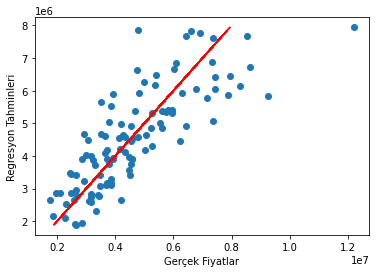

In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Modelin doğruluk oranı: {r2:.2f}")
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, color='red')
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Regresyon Tahminleri")
plt.show()

**5. Aşama: Modeli Yayma**

In [ ]:
print("Evin özelliklerini giriniz")
ozellik=[]
ozellik.append(int(input("Evin büyüklüğü bahçe dahil           : ")))
ozellik.append(int(input("Yatak odası sayısı                   : ")))
ozellik.append(int(input("Banyo sayısı                         : ")))
ozellik.append(int(input("Kat sayısı                           : ")))
ozellik.append(int(input("Otopark sayısı                       : ")))
ozellik.append(int(input("Ana yol bağlantısı var mı? [E=1/H=0] : ")))
ozellik.append(int(input("Misafir odası var mı?      [E=1/H=0] : ")))
ozellik.append(int(input("Bodrumu var mı?            [E=1/H=0] : ")))
ozellik.append(int(input("Sıcak su var mı?           [E=1/H=0] : ")))
ozellik.append(int(input("Klima var mı?              [E=1/H=0] : ")))
ozellik.append(int(input("Tam mobilyalı mı?          [E=1/H=0] : ")))
ozellik.append(int(input("Yarım mobilyalı mı?        [E=1/H=0] : ")))
print(ozellik)
tahmini_fiyat= model.predict([ozellik])
print("--------------------------------------------")
print("Tahmini ev fiyatı:",int(tahmini_fiyat),"...")
print("--------------------------------------------")

Evin özelliklerini giriniz


KeyboardInterrupt: ignored